In [13]:
#pip install web3.py

https://cryptomarketpool.com/send-a-transaction-to-the-ethereum-blockchain-using-python-and-web3-py/

https://trufflesuite.com/ganache/

https://trufflesuite.com/docs/truffle/getting-started/truffle-with-metamask.html

https://medium.com/geekculture/interacting-with-etherium-network-in-python-using-web3-py-1-329d4ec4db41

infura: https://consensys.net/blog/developers/how-to-send-money-using-python-a-web3-py-tutorial/

doku: https://web3py.readthedocs.io/en/stable/web3.eth.html

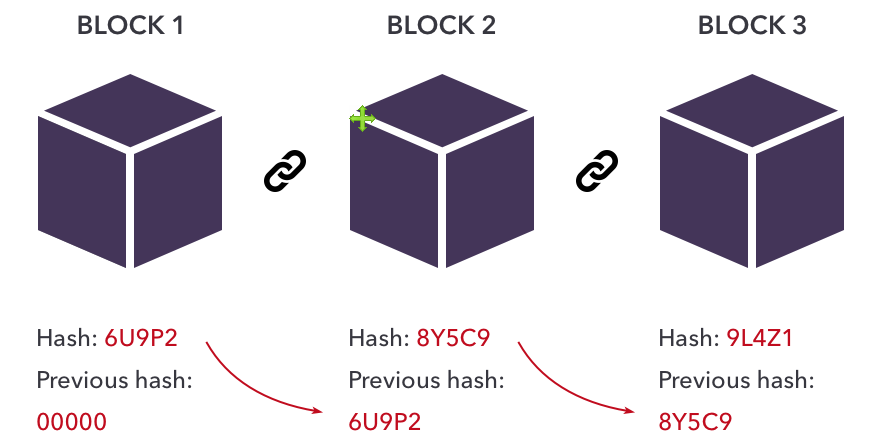

https://a.c-dn.net/c/content/dam/publicsites/igcom/uk/images/ContentImage/IG-What-is-blockchain-technology-Blocks-with-des.png

In [2]:
from web3 import Web3
import numpy as np

## set up a connection

In [18]:
ganache_url = 'HTTP://127.0.0.1:7545'
web3 = Web3(Web3.HTTPProvider(ganache_url))
account_1 = '0x61820560f171b77Df44382865a0fb1ca308E9D43'
private_key1 = '0da9b891af5b12ae86fcdff5baa2eb947522484ffa1377ee4ab346b4c28b1350'


account_2 = '0x3bD3703093d4f6cc52a5c6e7e63595EADDDF5C2A'
private_key2 = '94d34bd5f33f32bb8a45d68aab71f63c6f71b86de6dbb5d690dda74863925e41'


web3.isConnected()

True

## send an ETH transaction to the blockchain

In [19]:



#send trx from acc2 to acc1
#get the nonce.  Prevents one from sending the transaction twice
nonce = web3.eth.getTransactionCount(account_2)

#build a transaction in a dictionary
tx = {
    'nonce': nonce,
    'to': account_1,
    'value': web3.toWei(3, 'ether'),  # One ether = 1,000,000,000,000,000,000 wei (10e18) 
    'gas': 200000,
    'gasPrice': web3.toWei('50', 'gwei')
}

#sign the transaction
signed_tx = web3.eth.account.sign_transaction(tx, private_key2)

#send transaction
tx_hash = web3.eth.sendRawTransaction(signed_tx.rawTransaction)

#get transaction hash
print("transaction hash",web3.toHex(tx_hash))

# print the latest block number
print("block numbers:",web3.eth.block_number)



#nonce
    

transaction hash 0x3c314d8e9a1fe218cdc6158d5526f4052b0e50cb097bba56bac19fce7042861e
block numbers: 58


## show all blocks with trx and other information

In [20]:
i = 0

length_blockchains=web3.eth.block_number

while i <= length_blockchains:

    block = web3.eth.get_block(i) # example for a recent block
    for tx_hash in block['transactions']:
        tx = web3.eth.get_transaction(tx_hash)
        tx_obj = {'addr_sender': tx['from'], 'addr_receiver': tx['to'], 'value': tx['value']}
        
        print("\n block number:  ",block['number'])
        print(tx_obj)
        print("value: ",tx['value'])
        print(web3.toHex(tx_hash))
        
   


        print("block hash:  ",web3.toHex(block['hash']))
        print("tx hash:  ",(block['transactions'])    )
        print("block parentHash:  ",web3.toHex(block['parentHash']),"\n")
    
    
    i += 1    


 block number:   1
{'addr_sender': '0x61820560f171b77Df44382865a0fb1ca308E9D43', 'addr_receiver': '0x3bD3703093d4f6cc52a5c6e7e63595EADDDF5C2A', 'value': 1000000000000000000}
value:  1000000000000000000
0xfa9f65098a427b845e6e23028ad311e5c71213aa210106f9478190f69ff73b66
block hash:   0xf3057aad4d3342a3fd6c6663cd008ece1b4d72890199040e5cf5b78ccc8ae21d
tx hash:   [HexBytes('0xfa9f65098a427b845e6e23028ad311e5c71213aa210106f9478190f69ff73b66')]
block parentHash:   0x298660d656bff7ec80aeccce3ee6cca1de65d7798ad2b7fa8540212aa077cc54 


 block number:   2
{'addr_sender': '0x61820560f171b77Df44382865a0fb1ca308E9D43', 'addr_receiver': '0x3bD3703093d4f6cc52a5c6e7e63595EADDDF5C2A', 'value': 50000000000000000000}
value:  50000000000000000000
0xa2229feeaf817cd2f952da1918b25bcdfe08fa4b4336e79bfa31909cde62eea8
block hash:   0x4cee422b34ad867ac6199e1b2332b11995423f271a5027b72f3a7ea270f90466
tx hash:   [HexBytes('0xa2229feeaf817cd2f952da1918b25bcdfe08fa4b4336e79bfa31909cde62eea8')]
block parentHash:   0xf